# Question 1

### Credit Card Dataset

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv("C:\\Datasets\\cust_seg.csv", index_col="custid")
df.sample(5)

,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
custid,,,,,,,,,
159,0,4,3,1,2,55,61,64.8,67.1
21,0,1,2,1,1,44,44,73.2,48.4
66,1,4,2,1,3,68,62,67.2,68.2
86,0,4,3,1,1,44,33,64.8,36.3
113,0,4,2,1,2,44,52,61.2,57.2


In [19]:
df.groupby("sex").mean()

,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
sex,,,,,,,,
0,3.428571,2.153846,1.153846,2.021978,52.824176,50.120879,63.534066,55.132967
1,3.431193,1.972477,1.165138,2.027523,51.733945,54.990826,62.873394,60.489908


In [21]:
df.describe()

,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.54500,3.430000,2.055000,1.160000,2.025000,52.230000,52.775000,63.174000,58.052500
std,0.49922,1.039472,0.724291,0.367526,0.690477,10.252937,9.478586,11.242137,10.426445
min,0.00000,1.000000,1.000000,1.000000,1.000000,28.000000,31.000000,39.600000,34.100000
25%,0.00000,3.000000,2.000000,1.000000,2.000000,44.000000,45.750000,54.000000,50.325000
50%,1.00000,4.000000,2.000000,1.000000,2.000000,50.000000,54.000000,62.400000,59.400000
75%,1.00000,4.000000,3.000000,1.000000,2.250000,60.000000,60.000000,70.800000,66.000000
max,1.00000,4.000000,3.000000,2.000000,3.000000,76.000000,67.000000,90.000000,73.700000


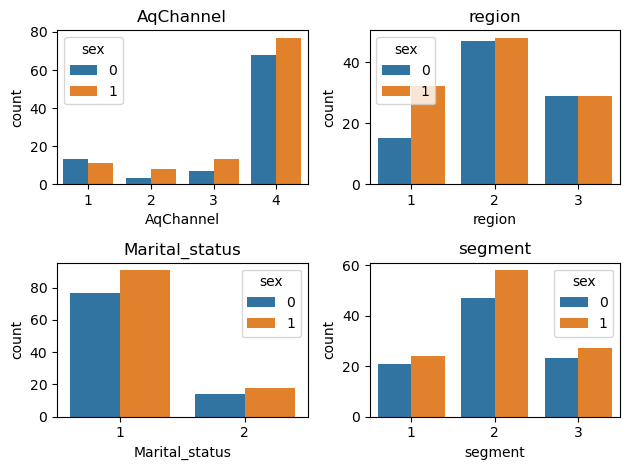

In [29]:
for i, col in enumerate(['AqChannel', 'region', 'Marital_status', 'segment']):
    axs = plt.subplot(2,2,i+1)
    sns.countplot(data = df,x=col,hue="sex", ax=axs)
    axs.set_title(col)

plt.tight_layout()

<Axes: >

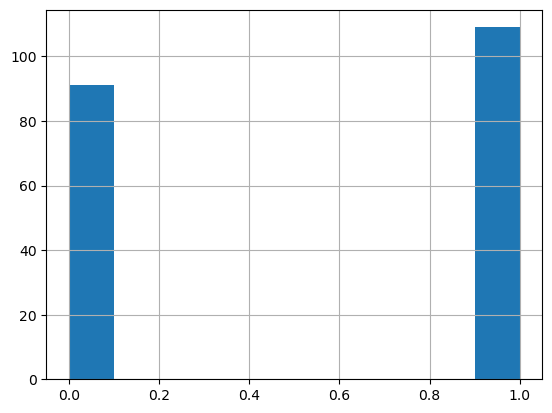

In [31]:
df["sex"].hist()

### 1. Is there any difference between males and females in terms of credit card usage?

In [45]:
from statsmodels.stats.proportion import proportions_ztest

<Axes: xlabel='sex'>

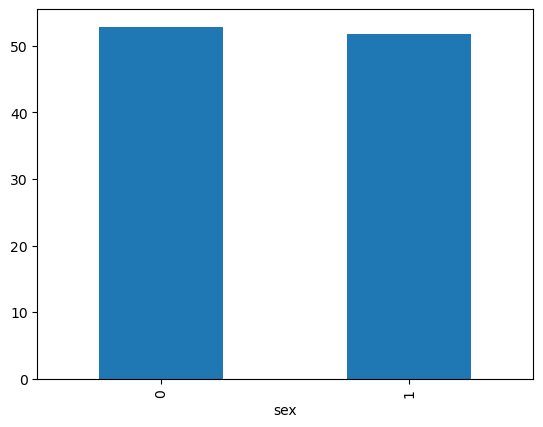

In [51]:
## Average credit card uases vs Gender
Avg_Credit = df.groupby("sex")["pre_usage"].mean()
Avg_Credit.plot(kind="bar")

In [112]:
pre_usage_mean_gender = df.groupby("sex")["pre_usage"].mean()
total_by_gender = df['sex'].value_counts()

# Mean of females and males 
females = pre_usage_mean_gender[0]
males = pre_usage_mean_gender[1]

# Total number of females and males
total_females = total_by_gender[0]
total_males = total_by_gender[1]

# Two-proportion z-test
count = [females, males]
nobs = [total_females, total_males]

stat, p_value = proportions_ztest(count, nobs)

print(f'Statistic: {stat}')
print(f'P-value: {p_value}')

Statistic: 1.4925918780867844
P-value: 0.13554405065933314


In [114]:
if p_value < 1.96 and p_value > -1.96:
    print("We Accept the Null Hypothesis: \n There is no difference between males and females in terms of credit card usage")
else:
    pint("Reject H0")

We Accept the Null Hypothesis: 
 There is no difference between males and females in terms of credit card usage


### 2. Is there any difference between segments of customers in terms of credit card usage?

In [102]:
per_use_segment = df.groupby("segment")["pre_usage"].mean()
per_use_segment

segment
1    49.755556
2    56.161905
3    46.200000
Name: pre_usage, dtype: float64

<Axes: xlabel='segment', ylabel='pre_usage'>

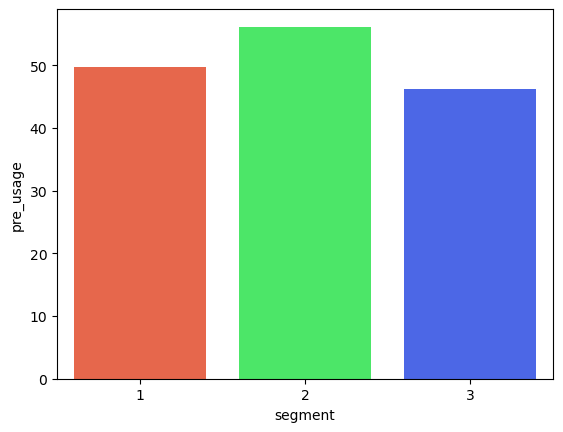

In [110]:
per_use_segment = per_use_segment.reset_index()
custom_palette = ['#FF5733', '#33FF57', '#3357FF']
sns.barplot(data =per_use_segment, x="segment", y="pre_usage",palette=custom_palette)

In [116]:
pre_usage_mean_gender = df.groupby("segment")["pre_usage"].mean()
total_by_gender = df['segment'].value_counts()

In [118]:
total_by_gender

segment
2    105
3     50
1     45
Name: count, dtype: int64

In [122]:
import scipy.stats as stats

# ANOVA test
anova_result = stats.f_oneway(
    df[df['segment'] == 1]['pre_usage'],
    df[df['segment'] == 2]['pre_usage'],
    df[df['segment'] == 3]['pre_usage']
)

print('ANOVA Result:', anova_result)


ANOVA Result: F_onewayResult(statistic=21.28234763340855, pvalue=4.283274139124812e-09)


In [130]:
## P_value for anova test
p_value = anova_result.pvalue

## Hypothesis
if p_value < 1.96 and p_value > -1.96:
    print("We Accept the Null Hypothesis: \n There is no difference between in segment credit card usage")
else:
    pint("Reject H0")

We Accept the Null Hypothesis: 
 There is no difference between in segment credit card usage


In [128]:
anova_result.pvalue

4.283274139124812e-09

# Question 2

### 1. Create portfolio for the given stocks:  'GLD', 'AMZN'  for th last 10 years.lio.

In [144]:
import yfinance as yf

# Historical data for GLD and AMZN
tickers = ['GLD', 'AMZN']
data = yf.download(tickers, start='2013-12-07', end='2023-12-07')['Adj Close']

# Daily returns
daily_returns = data.pct_change().dropna()

[*********************100%***********************]  2 of 2 completed


In [151]:
daily_returns.head()

Ticker,AMZN,GLD
Date,,
2013-12-10,0.007509,0.017541
2013-12-11,-0.014415,-0.007880
2013-12-12,-0.002460,-0.021264
2013-12-13,0.007843,0.009215
2013-12-16,0.012310,0.002597


### 2. Visualize the expected returns on the 10 years series.

<Figure size 1400x700 with 0 Axes>

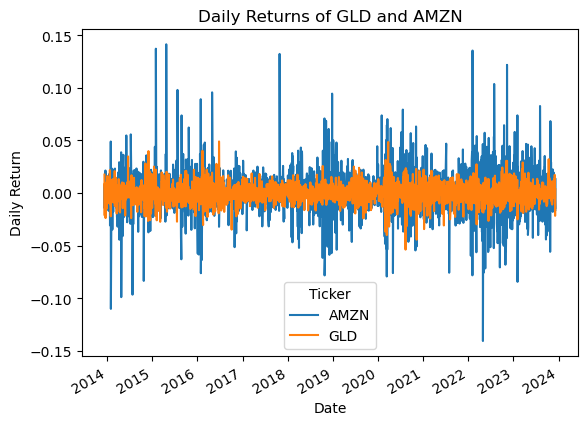

In [149]:
# Daily returns
plt.figure(figsize=(14, 7))
daily_returns.plot(title='Daily Returns of GLD and AMZN')
plt.ylabel('Daily Return')
plt.show()

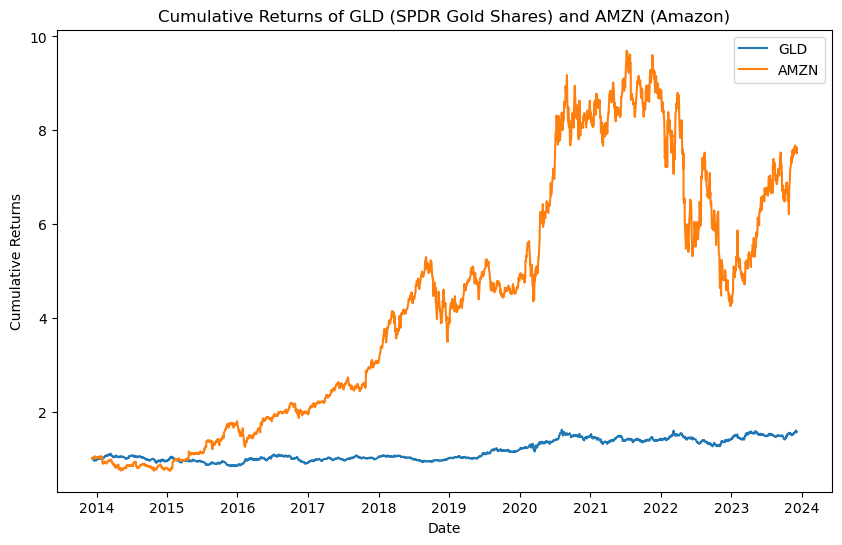

In [160]:
#cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()

plt.figure(figsize=(10, 6))
for stock in ['GLD', 'AMZN']:
    plt.plot(cumulative_returns.index, cumulative_returns[stock], label=stock)
plt.title('Cumulative Returns of GLD (SPDR Gold Shares) and AMZN (Amazon)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

### 3. Evaluate the annual daily mean, correlation,   Sharpe ratio and daily standard mean.

In [153]:
# Evaluate key metrics
annual_mean = daily_returns.mean() * 252
annual_std = daily_returns.std() * np.sqrt(252)
correlation = daily_returns.corr()
sharpe_ratio = (annual_mean) / annual_std  

print("Annual Daily Mean Return:\n", annual_mean)
print("\nAnnual Standard Deviation:\n", annual_std)
print("\nCorrelation Matrix:\n", correlation)
print("\nSharpe Ratio:\n", sharpe_ratio)

Annual Daily Mean Return:
 Ticker
AMZN    0.256958
GLD     0.055132
dtype: float64

Annual Standard Deviation:
 Ticker
AMZN    0.331730
GLD     0.141404
dtype: float64

Correlation Matrix:
 Ticker      AMZN       GLD
Ticker                    
AMZN    1.000000  0.024347
GLD     0.024347  1.000000

Sharpe Ratio:
 Ticker
AMZN    0.774598
GLD     0.389888
dtype: float64


<Axes: xlabel='Ticker', ylabel='Ticker'>

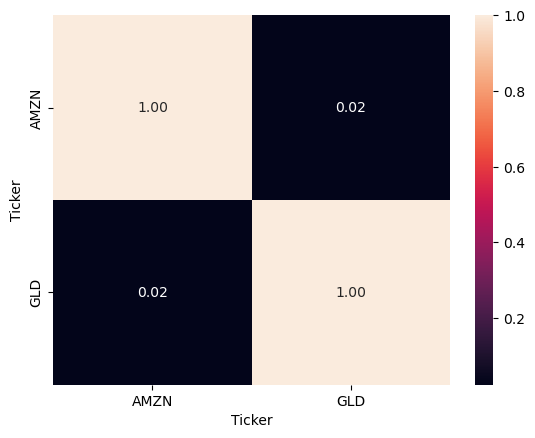

In [155]:
# Correlation matrix
correlation = daily_returns.corr()
sns.heatmap(correlation,annot=True,fmt='.2f')

- There is no correlation between both Share

In [166]:
#Function to calculate portfolio return
def portfolioreturn(weights):
    return np.dot(daily_returns.mean(),weights)*252

# To calculate Profile Standard Deviation
def portfoliostd(weights):
    return (np.dot(np.dot(daily_returns.cov(),weights),weights))**(1/2)*np.sqrt(252)

# This will Generate random weights
def weightscreator(daily_returns):
    rand = np.random.random(len(daily_returns.columns))
    rand /= rand.sum()
    return rand

In [168]:
Nreturns = []
stds = []
w = []

for i in range(1000): #Use the number of iterations you seem fit
    weights = weightscreator(daily_returns)
    Nreturns.append(portfolioreturn(weights))
    stds.append(portfoliostd(weights))
    w.append(weights)

#### Matplotlib To Plot The Efficient Frontier

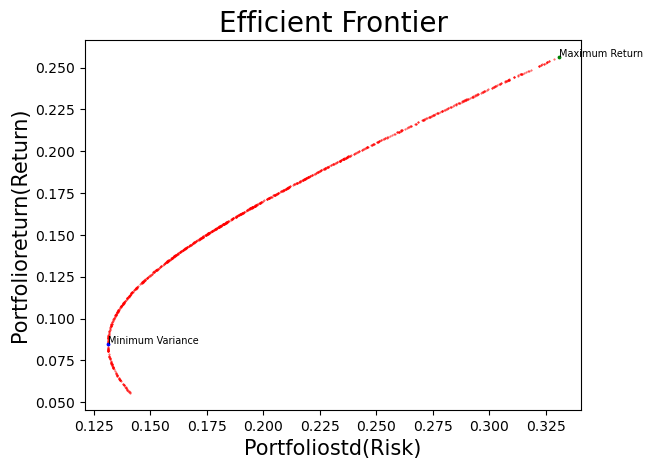

<Figure size 3000x2000 with 0 Axes>

In [172]:
plt.scatter(stds,Nreturns,c="red",s=0.2,alpha=0.75) #Customise size according to number of iterations being plotter
plt.scatter(stds[Nreturns.index(max(Nreturns))], max(Nreturns),c = "green", s=3) #Customise size for this too
plt.text(stds[Nreturns.index(max(Nreturns))],max(Nreturns),"Maximum Return", fontsize=7) 
plt.scatter(min(stds),Nreturns[stds.index(min(stds))] ,c = "blue", s=3) 
plt.text(min(stds),Nreturns[stds.index(min(stds))],"Minimum Variance", fontsize=7) #
plt.title("Efficient Frontier", fontsize = 20)
plt.xlabel("Portfoliostd(Risk)", fontsize = 15)
plt.ylabel("Portfolioreturn(Return)", fontsize = 15)
plt.figure(figsize=(30,20))
plt.show()

### 4. Discuss on the optimal portfolio and the different parameters evaluated for the portfolio.

In [174]:
print("Max return =", max(Nreturns))
print("Corresponding Standard Deviation =", stds[Nreturns.index(max(Nreturns))])

Max return = 0.2563377069426567
Corresponding Standard Deviation = 0.3307220767665893


In [176]:
for i in range(1000000): #Use the number of iterations you seem fit
    weights = weightscreator(daily_returns)
    if (portfolioreturn(weights) >= max(Nreturns)):
        weight_new = weights
        print("Your Efficient Portfolio is:",weight_new) #Returns portfolio weights for above condition being satisfied
        break

Your Efficient Portfolio is: [0.99693517 0.00306483]


In [178]:
print("Returns corresponding to weights found :",portfolioreturn(weight_new)) #Prints return of found weights
print("Risk associated with weights found :",portfoliostd(weight_new)) #Prints Risk of found weights

Returns corresponding to weights found : 0.25633901869597897
Risk associated with weights found : 0.3307242092403023


 - Efficient Portfolio is: [0.99693517, 0.00306483] for amazn and GLD write ending statement. Given the efficient portfolio weights of 99.69% in AMZN and 0.31% in GLD, it's clear that Amazon plays a dominant role in this optimal portfolio, based on historical data and our analysis criteria.